In [22]:
from ensmallen.datasets.linqs import Cora
from embiggen.embedders import TransE

In [23]:
cora = Cora()
# cora = cora.filter_from_names(node_type_name_to_filter=["Word"])#.remove_edge_types()
cora

The undirected graph Cora has 4141 nodes There are 1 singleton nodes, and 54494 weighted edges, of which none are self-loops. The graph is sparse as it has a density of 0.00636 and has 2 connected components, where the component with most nodes has 4140 nodes and the component with the least nodes has a single node. The graph median node degree is 22, the mean node degree is 26.32, and the node degree mode is 24. The top 5 most central nodes are word_1177 (degree 1083), word_1263 (degree 980), word_507 (degree 676), word_1209 (degree 584) and word_19 (degree 560). The hash of the graph is 11ca413ad9c5be9b.

In [24]:
model = TransE(
    cora,
    distance_metric="COSINE",
)

/Users/lucacappelletti/github/embiggen/embiggen/embedders/siamese.py:92: UserWarning: The graph contains disconnected nodes: these nodes will not be embedded in a semantically sensible way, but will only obtain a random node embedding vector which is from all other nodes.
  "The graph contains disconnected nodes: these nodes will "


In [40]:
cora.node2vec(128, 100, 6)

(array([[ 186, 3208,  186, ..., 2834,  744, 2911],
        [3208,  186,  566, ...,  744, 2911, 1246],
        [ 186,  566,  333, ..., 2911, 1246, 4089],
        ...,
        [3345, 1673, 3885, ...,  275,  464,  573],
        [1673, 3885, 2146, ...,  464,  573, 2759],
        [3885, 2146, 3920, ...,  573, 2759,  467]], dtype=int32),
 array([ 414, 1445,  344, ..., 3429, 1354, 1089], dtype=int32))

In [25]:
history = model.fit()

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [26]:
embedding = model.get_embedding_dataframe()

In [27]:
embedding.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,-0.105191,0.071402,-0.544217,-0.209524,-0.484867,0.475369,-0.577401,-0.817735,-0.460034,0.541916,...,0.178894,0.049199,0.022002,1.113835,-0.474183,-0.924770,0.179467,1.247610,-0.236086,0.341815
std,0.158021,0.236969,0.321302,0.237295,0.379480,0.321639,0.230322,0.600281,0.222928,0.448041,...,0.186638,0.281836,0.308450,0.610289,0.245194,0.453127,0.161621,0.547840,0.199144,0.226183
min,-0.660985,-0.799376,-0.941732,-0.769702,-0.818822,-1.008703,-0.793147,-1.256516,-0.672162,-1.019668,...,-0.735197,-0.834702,-0.885457,-1.319178,-0.833683,-1.290207,-0.660617,-0.958157,-0.833299,-0.869860
25%,-0.120719,0.087619,-0.721168,-0.296330,-0.658861,0.375733,-0.730670,-1.141151,-0.597638,0.644313,...,0.157725,0.045084,0.000845,1.108280,-0.610463,-1.194131,0.154077,1.138938,-0.285383,0.313209
50%,-0.097262,0.130902,-0.690193,-0.271303,-0.620480,0.610933,-0.662556,-1.067076,-0.548578,0.697766,...,0.203715,0.071591,0.015460,1.368900,-0.575891,-1.143283,0.210233,1.494946,-0.256985,0.427049
75%,-0.057317,0.153710,-0.565315,-0.237588,-0.577918,0.664335,-0.466764,-0.811552,-0.380130,0.728210,...,0.237698,0.097562,0.031197,1.455245,-0.501893,-0.722689,0.234817,1.566682,-0.213200,0.471244
max,0.305315,0.454750,0.961424,0.927036,0.794044,0.734327,0.846340,1.852259,0.839986,0.987518,...,0.755811,0.836722,0.919874,1.565198,0.821267,1.012608,0.685749,1.709106,0.455290,0.529179


In [28]:
from embiggen import GraphVisualization

visualizer = GraphVisualization(cora)

In [29]:
visualizer.fit_transform_nodes(embedding)

In [30]:
visualizer.fit_transform_edges(embedding, )

(<Figure size 1400x1400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91db369690>)

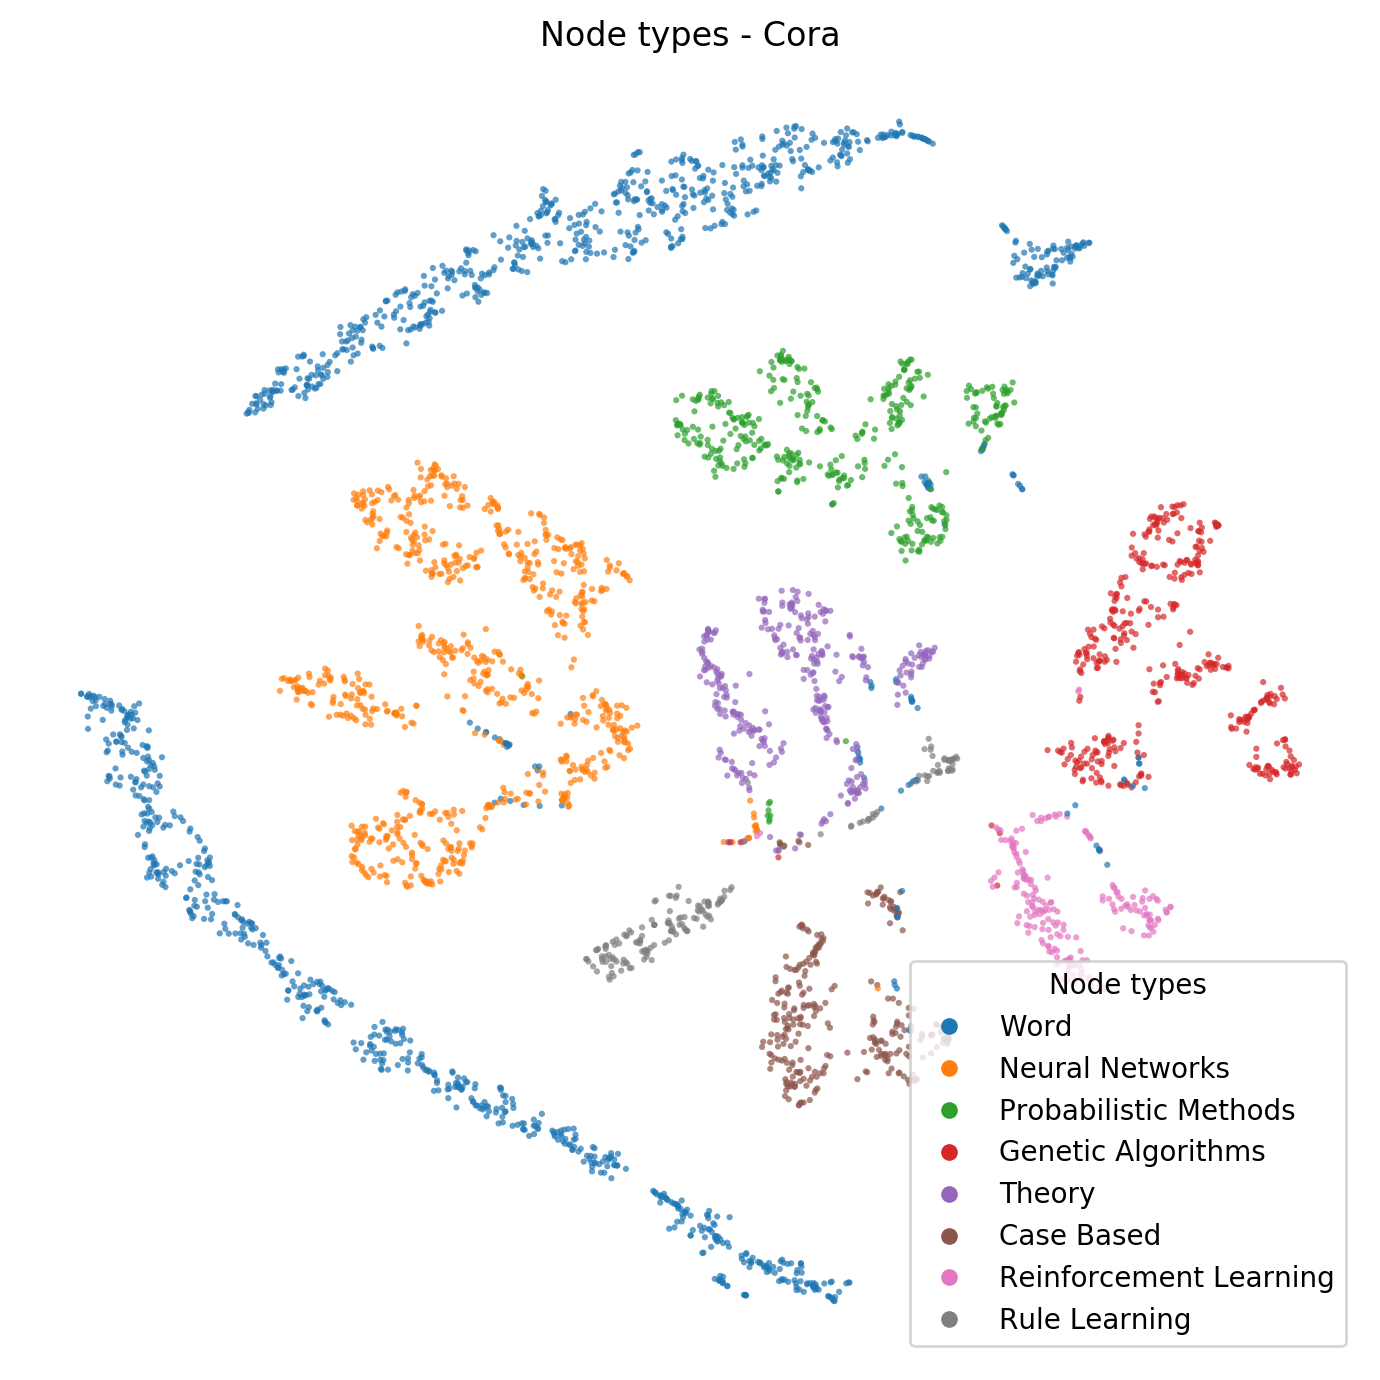

In [31]:
visualizer.plot_node_types()

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


(<Figure size 1400x1400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91989bac90>)

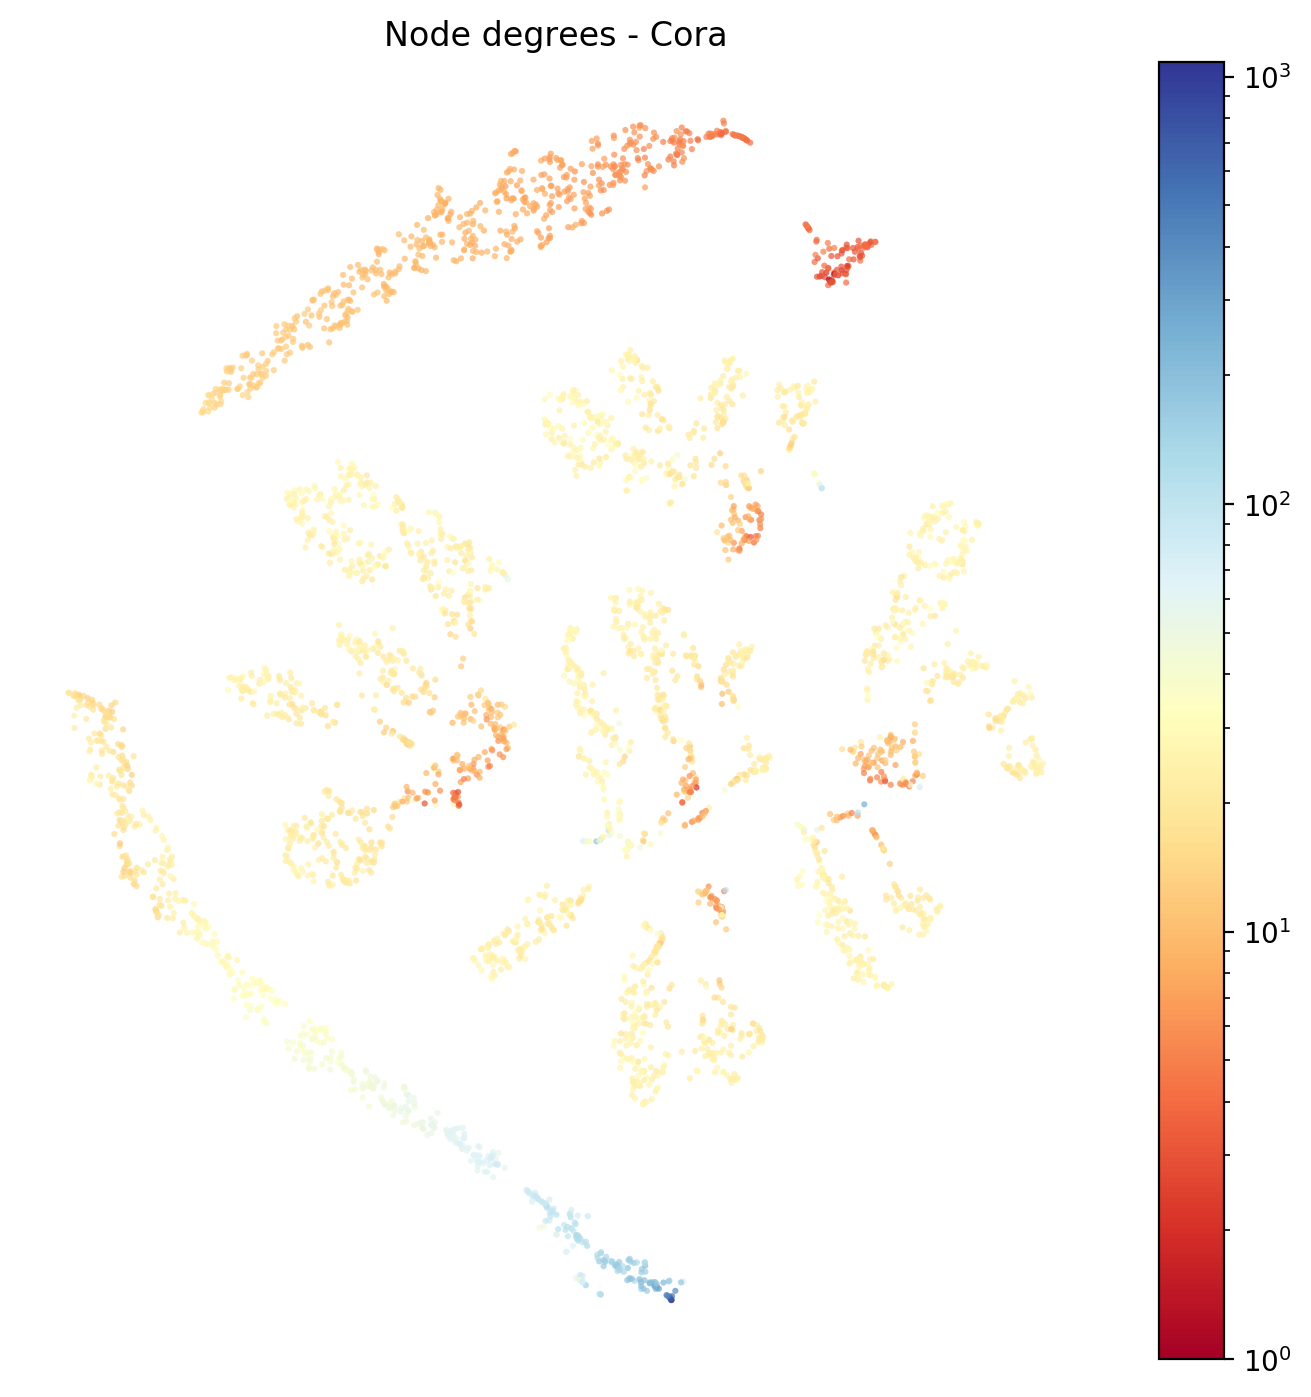

In [32]:
visualizer.plot_node_degrees()

(<Figure size 1400x1400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f921a60c3d0>)

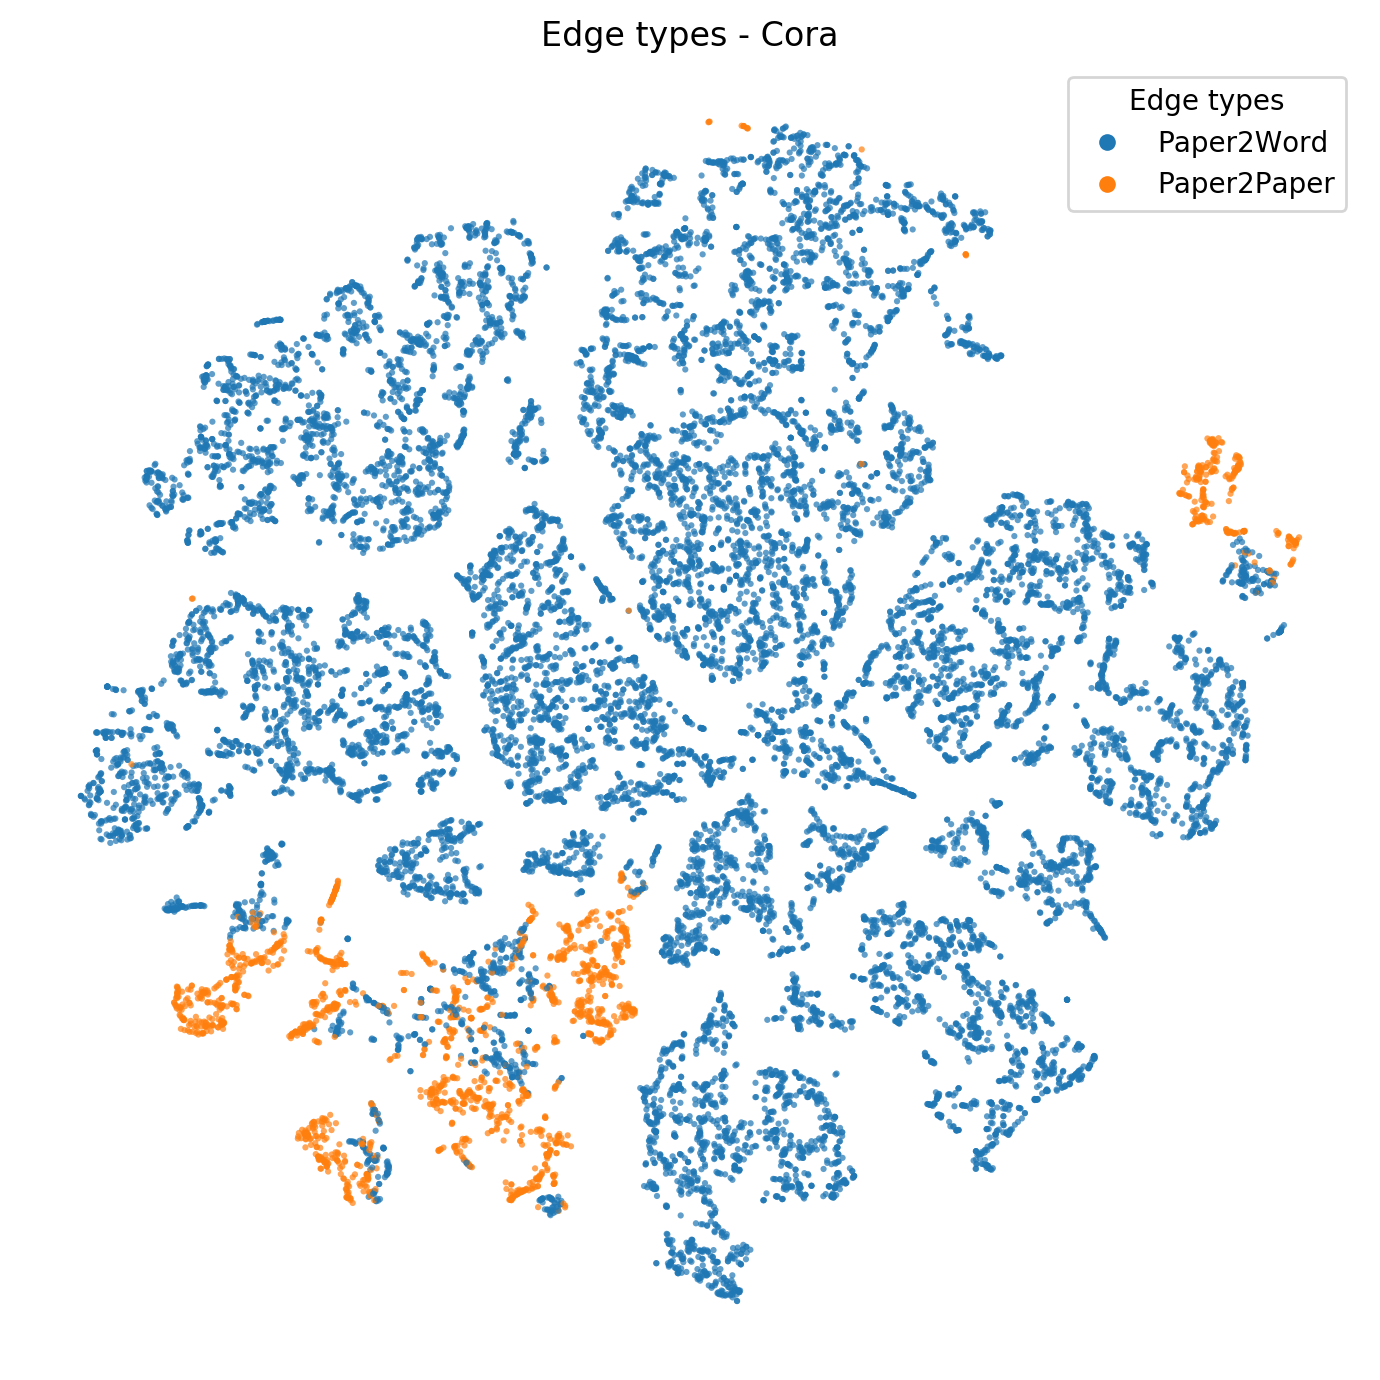

In [33]:
visualizer.plot_edge_types()